In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

## explore

In [128]:
def get_curve_points(obs_frac, x0, y0, t):
    '''
        x0, y0 are the (known) initial frequencies of the full-length genotypes x and y
    '''

    min_x = -5
    max_x = 5
    resolution = 0.01
    
    def func(x):
        a = (1 - x0) / x0
        b = (1 - y0) / y0
        numer = b * (a * obs_frac) + np.exp(x * t) * (obs_frac - 1)
        denom = a * (obs_frac - 1) + np.exp(x * t) * (obs_frac - 2)
        y = np.log(-numer / denom) / t
        return y
        
    xs = np.arange(min_x, max_x, resolution)
    ys = [func(s) for s in xs]
    
    return xs, ys

/ahg/regevdata/users/maxwshen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


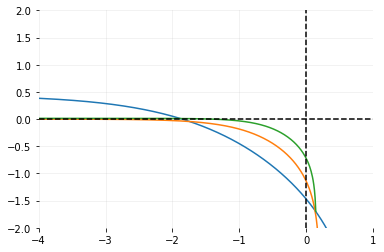

In [129]:
xs, ys = get_curve_points(obs_frac = 0.7, x0 = 0.4, y0 = 0.6, t = 1)
plt.plot(xs, ys)

xs, ys = get_curve_points(obs_frac = 0.6, x0 = 0.4, y0 = 0.6, t = 2)
plt.plot(xs, ys)

xs, ys = get_curve_points(obs_frac = 0.61, x0 = 0.4, y0 = 0.6, t = 3)
plt.plot(xs, ys)

# xs, ys = get_curve_points(obs_frac = 0.9, x0 = 0.4, y0 = 0.6, t = 1000)
# plt.plot(xs, ys)

plt.xlim(left = -4, right = 1)
plt.ylim(top = 2, bottom = -2)

sns.despine(left = True, bottom = True)
plt.axvline(x = 0, color = 'black', linestyle = '--')
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.grid(alpha = 0.2)

/ahg/regevdata/users/maxwshen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


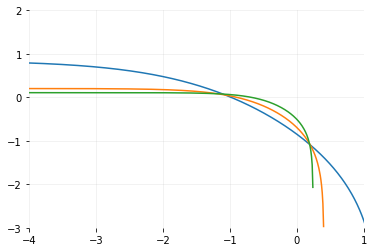

In [130]:
xs, ys = get_curve_points(obs_frac = 0.7, x0 = 0.4, y0 = 0.5, t = 1)
plt.plot(xs, ys)

xs, ys = get_curve_points(obs_frac = 0.6, x0 = 0.4, y0 = 0.5, t = 2)
plt.plot(xs, ys)

xs, ys = get_curve_points(obs_frac = 0.58, x0 = 0.4, y0 = 0.5, t = 3)
plt.plot(xs, ys)

# xs, ys = get_curve_points(obs_frac = 0.9999999, x0 = 0.4, y0 = 0.5, t = 100)
# plt.plot(xs, ys)

plt.xlim(left = -4, right = 1)
plt.ylim(top = 2, bottom = -3)

sns.despine(left = True, bottom = True)
# plt.axvline(x = 0, color = 'black', linestyle = '--')
# plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.grid(alpha = 0.2)

**Claim**: Given two points (x_a, y_a) and (x_b, y_b) that are the intersections of two curves and represent two possible fitness solutions, there exists no unused timepoint and any possible observed sum frequency that maintain the existence of two possible fitness solutions => any possible observation at any unused timepoint will reduce the solution set to a single solution, or to no solutions (which is incompatible with our model). Thus, T=3 timepoints is sufficient for identifiability when we observe the additive combination of two full-length genotypes and know their initial frequencies.

Given two points (x_a, y_a) and (x_b, y_b) and initial settings (x0, y0), we can solve for (obs_frac = z, t) in closed-form, and we will find that there are only two possible solutions in the set.
-> Not sure how to solve for (z, t) though. Seems hard.

Easier: (?)
Given a point (x_a, y_a), initial settings (x0, y0), and some time t, we can solve for (obs_frac = z) and observe that there is only one solution, and it does not also satisfy (x_b, y_b). (This doesn't work.)

**Another approach**: Given initial frequencies (x0, y0) and fitnesses (x, y), we can compute z at all t to obtain an infinite set of curves (?) by varying across t. Prove that there exist N curves in this infinite set that have just one mutual intersection, which means that (x, y) are identifiable. 

## num. solutions for z, t

In [137]:
def t_to_z(x0, y0, x, y, t):
    a = (1 - x0) / x0 
    b = (1 - y0) / y0 

    logistic_x = 1 / (1 + a * np.exp(-x * t))
    logistic_y = 1 / (1 + b * np.exp(-y * t))

    return logistic_x + logistic_y


def get_curve_points_zt(x0, y0, x, y):
    '''
    '''

    min_t = 0
    max_t = 10
    resolution = 0.01
    
    ts = np.arange(min_t, max_t, resolution)
    zs = [t_to_z(x0, y0, x, y, s) for s in ts]
    
    return ts, zs

In [148]:
print(t_to_z(x0 = 0.4, y0 = 0.5, x = -1.067, y = 0.0538, t = 1))
print(t_to_z(x0 = 0.4, y0 = 0.5, x = -1.067, y = 0.0538, t = 2))


0.7000149755529141
0.6000115011132814


In [149]:
print(t_to_z(x0 = 0.4, y0 = 0.5, x = .200856, y = -1.09342, t = 1))
print(t_to_z(x0 = 0.4, y0 = 0.5, x = .200856, y = -1.09342, t = 2))


0.7000002533599974
0.6000002259788818


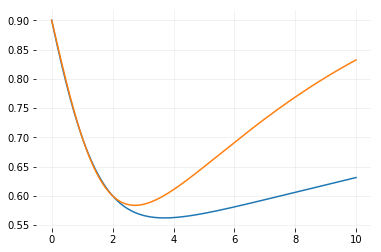

In [146]:
ts, zs = get_curve_points_zt(x0 = 0.4, y0 = 0.5, x = -1.06711, y = 0.0538068)
plt.plot(ts, zs)

ts2, zs2 = get_curve_points_zt(x0 = 0.4, y0 = 0.5, x = .200856, y = -1.09342)
plt.plot(ts2, zs2)

# plt.xlim(left = -4, right = 1)
# plt.ylim(top = 2, bottom = -3)

sns.despine(left = True, bottom = True)
# plt.axvline(x = 0, color = 'black', linestyle = '--')
# plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.grid(alpha = 0.2)

In [147]:
abs(np.array(zs) - np.array(zs2))

array([0.00000000e+00, 1.72421044e-04, 3.39604790e-04, 5.01587224e-04,
       6.58405468e-04, 8.10097763e-04, 9.56703454e-04, 1.09826297e-03,
       1.23481781e-03, 1.36641052e-03, 1.49308467e-03, 1.61488486e-03,
       1.73185665e-03, 1.84404659e-03, 1.95150218e-03, 2.05427184e-03,
       2.15240491e-03, 2.24595161e-03, 2.33496302e-03, 2.41949105e-03,
       2.49958847e-03, 2.57530881e-03, 2.64670638e-03, 2.71383626e-03,
       2.77675424e-03, 2.83551681e-03, 2.89018115e-03, 2.94080511e-03,
       2.98744714e-03, 3.03016632e-03, 3.06902231e-03, 3.10407532e-03,
       3.13538611e-03, 3.16301595e-03, 3.18702657e-03, 3.20748020e-03,
       3.22443947e-03, 3.23796744e-03, 3.24812756e-03, 3.25498364e-03,
       3.25859982e-03, 3.25904055e-03, 3.25637059e-03, 3.25065495e-03,
       3.24195888e-03, 3.23034784e-03, 3.21588751e-03, 3.19864371e-03,
       3.17868242e-03, 3.15606973e-03, 3.13087183e-03, 3.10315499e-03,
       3.07298554e-03, 3.04042983e-03, 3.00555420e-03, 2.96842500e-03,
      

In [157]:
np.array(zs) - np.array(zs2)

array([ 0.00000000e+00, -1.72421044e-04, -3.39604790e-04, -5.01587224e-04,
       -6.58405468e-04, -8.10097763e-04, -9.56703454e-04, -1.09826297e-03,
       -1.23481781e-03, -1.36641052e-03, -1.49308467e-03, -1.61488486e-03,
       -1.73185665e-03, -1.84404659e-03, -1.95150218e-03, -2.05427184e-03,
       -2.15240491e-03, -2.24595161e-03, -2.33496302e-03, -2.41949105e-03,
       -2.49958847e-03, -2.57530881e-03, -2.64670638e-03, -2.71383626e-03,
       -2.77675424e-03, -2.83551681e-03, -2.89018115e-03, -2.94080511e-03,
       -2.98744714e-03, -3.03016632e-03, -3.06902231e-03, -3.10407532e-03,
       -3.13538611e-03, -3.16301595e-03, -3.18702657e-03, -3.20748020e-03,
       -3.22443947e-03, -3.23796744e-03, -3.24812756e-03, -3.25498364e-03,
       -3.25859982e-03, -3.25904055e-03, -3.25637059e-03, -3.25065495e-03,
       -3.24195888e-03, -3.23034784e-03, -3.21588751e-03, -3.19864371e-03,
       -3.17868242e-03, -3.15606973e-03, -3.13087183e-03, -3.10315499e-03,
       -3.07298554e-03, -

By a geometric argument, there are either zero, one, or two solutions for (x, y) given observations at two timepoints. The only non-trivial situation is where there are two solutions.

Given (x1, y1) and (x2, y2) as putative solutions, the function f(z|t, x0 = x0, y0 = y0, x = x1, y = y1) as a function of t has a different derivative than the function f(z|t, x0 = x0, y0 = y0, x = x2, y = y2), thus they are different curves. Next: Characterize or bound how many intersections they can have. If few intersections are possible, then we can, with high probability, achieve identifiability by sampling a third timepoint. 

Seems hard to count the number of zeros. Not sure how to approach this. Cannot reparameterize into a system of polynomials since x and y are not expected to be integers. Even if I could, it's still hard to count zeros in a systemf polynomials.

However, by noting that the derivatives are different at the intersections, we can construct a third timepoint to measure that will distinguish the two possible solutions. Thus, we show that three samples is sufficient for identifiability, when the three samples can be constructed carefully.

Actually, even better: Since we have a system of 2 polynomial equations and two unknowns, then under mild conditions, the system is zero-dimensional, meaning there is a finite set of zeros. Since we can choose to sample any continuous t, the probability of choosing a third timepoint at random that fails to provide identifiability has measure zero. 

Next: Is there a way to extend this sufficient criteria to higher dimensions, and to the case where we no longer know the starting frequencies?

**February 6th, 2020 update**

---

When $T*M > d$, we can use a change of variables of $e^{-x} = x$ to obtain a system of Pfaffian equations that look like a system of polynomials but the powers are real numbers corresponding to $t$. Any balanced or overdetermined system of Pfaffian equations with no common components (algebraic curves that overlap everywhere) has finite or zero solutions. At this stage, we therefore have a finite set of solutions $W$, where each solution is a vector $w_i$. (Analog to a geometric argument yielding two possible solutions for the fitness vector w)

Each putative solution vector $w_i$ (of which there are potentially exponentially many) yields a function $f(z|t, s_0 = s_0, w = w_i)$, where $s_0$ is a known vector of initial genotype frequencies.

<del>Plug in each $w_i$ to obtain a system of $|W|$ polynomial equations, where we seek to solve for $t, z$. There are two cases: if $|W| = 1$, then the size of our solution set is 1 and we have a unique solution and no identifiability issues. If $|W| \geq 2$, there are finitely many solutions of $t, z$ that satisfy all $|W|$ polynomial equations. This finite set has measure zero in $\mathbb{R}^+$. Thus, by sampling a new $t$, we will almost surely find an observation that fails to simultaneously satisfy all $|W|$ polynomial equations, reducing the size of the solution set. However, I want something stronger, that reduces $|W|$ directly to 1.<del>

Without loss of generality, let $w_0$, the first element in $W$, be the true latent parameter. Then, consider a pair $w_0$ and $w_i$. Use them to construct a system of two polynomial equations and solve for $t, z$. Since this system of Pfaffian equations has 2 equations and 2 unknowns, this system has a finite (measure zero) set of solutions: call this set $s_{0,i}$. By taking a single new measurement at $t \in \mathbb{R}^+$, we can distinguish $w_0$ from $w_i$ with probability 1.

We can extend this to consider our ability to distinguish $w_0$ from $W/0 = {w_i \in W | i \neq 0}$. The probability that the new measurement distinguishes $w_0$ from all of $W/0$ is probability 1 multiplied by $|W/0|$ = probability 1. We therefore achieve identifiability almost surely.

Thus, a single additional measurement reduces the solution set to $w_0$, and we achieve identifiability almost surely. 

Tasks:
- Show that all algebraic curves do not overlap everywhere with any other curve
- Show that $f(z|t, s_0 = s_0, w = w_i)$ are unique for all $w_i$ almost everywhere in $t \in \mathbb{R}^{+}$

Miscellaneous archived statements
The intersection of two measure zero sets also has measure zero. <del> By extension, the intersection of the solution set of all pairs in $W$ has measure zero. <del>

We now show that $f(z|t, s_0 = s_0, w = w_i)$ are unique for all $w_i$ almost everywhere in $t \in \mathbb{R}^{+}$. 

## reparameterization

In [150]:
def get_curve_points_reparam(obs_frac, x0, y0, t):
    '''
        x0, y0 are the (known) initial frequencies of the full-length genotypes x and y
    '''

    min_x = 0
    max_x = 10
    resolution = 0.01
    
    def func(x):
        a = (1 - x0) / x0
        b = (1 - y0) / y0
        
        n1 = 1 / (obs_frac - (1 / (a * x**t + 1)))
        y = ((n1 - 1) / b)**(1/t)
        return y
        
    xs = np.arange(min_x, max_x, resolution)
    ys = [func(s) for s in xs]
    
    return xs, ys

/ahg/regevdata/users/maxwshen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


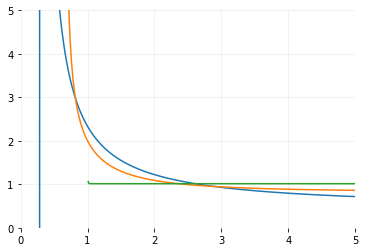

In [156]:
xs, ys = get_curve_points_reparam(obs_frac = 0.7, x0 = 0.4, y0 = 0.5, t = 1)
plt.plot(xs, ys)

xs, ys = get_curve_points_reparam(obs_frac = 0.6, x0 = 0.4, y0 = 0.5, t = 2)
plt.plot(xs, ys)

xs, ys = get_curve_points_reparam(obs_frac = 0.2, x0 = 0.4, y0 = 0.5, t = 100)
plt.plot(xs, ys)

plt.xlim(left = 0, right = 5)
plt.ylim(bottom = 0, top = 5)

sns.despine(left = True, bottom = True)
# plt.axvline(x = 0, color = 'black', linestyle = '--')
# plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.grid(alpha = 0.2)